In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `imshow` mode scenario of `plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from batchflow import plot

In [3]:
# Sample data generation
shape = (50, 50)
image = np.random.rand(*shape)

To plot an image, simply pass an array to class init.

<Figure size 576x576 with 1 Axes>

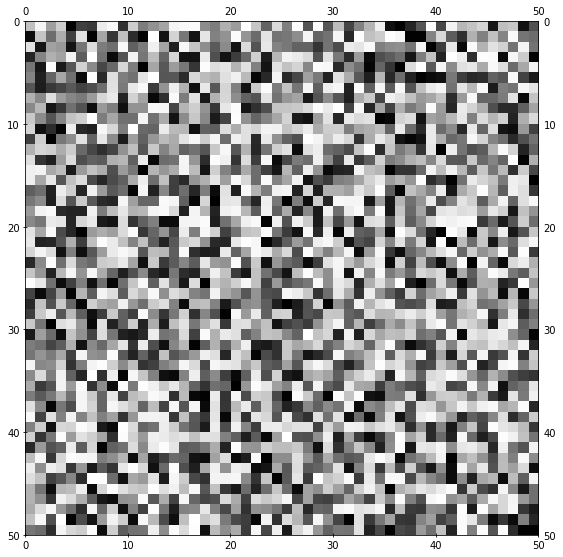

In [4]:
plot(image)

To annotate an image use parameters for correponding `matplotlib` functions.

If parameter name collision occurs, simply prefix it with specific method alias followed by underscore.

<Figure size 576x576 with 2 Axes>

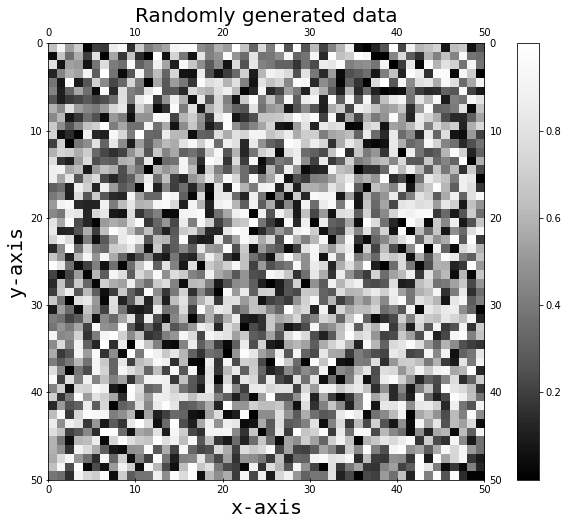

In [5]:
annotation_params = {
    'title_label': 'Randomly generated data',
    'xlabel': 'x-axis',
    'title_fontsize': 20,
    'ylabel': 'y-axis',
    'colorbar': True,
    'family': 'monospace',
    # using prefix, one can redirect parameter to specific annotation method
    'title_family': 'sans-serif'
}

plot(image, **annotation_params)

To change default image display parameters use arguments valid for `plt.imshow`.

<Figure size 576x576 with 2 Axes>

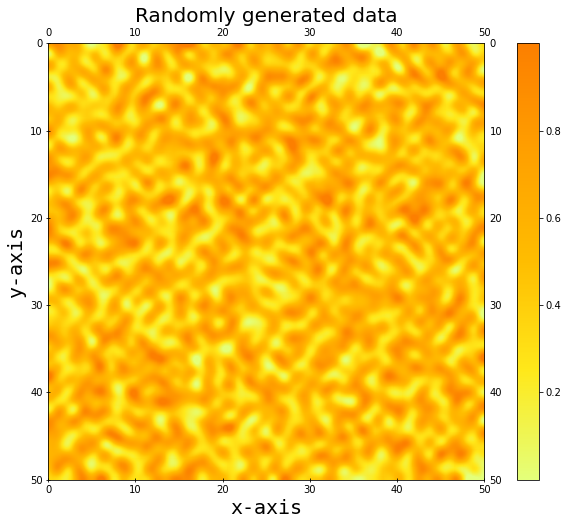

In [6]:
image_params = {
    'cmap': 'Wistia',
    'interpolation': 'bessel'
}

plot(image, **image_params, **annotation_params)

In [7]:
# Sample mask generation.
mask_0 = np.zeros(shape)
mask_0[image > 0.5] = 1

To overlay images one over another pass them in a list.

<Figure size 576x576 with 2 Axes>

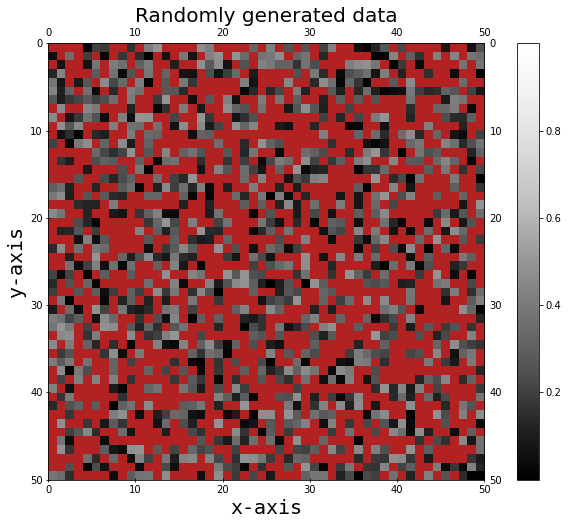

In [8]:
plot([image, mask_0], **annotation_params)

In [9]:
# Sample mask generation.
mask_1 = np.zeros(shape)
mask_1[image > 0.75] = 1

One can overlay as much masks as he/she wants — masks color list is looped.

<Figure size 576x576 with 2 Axes>

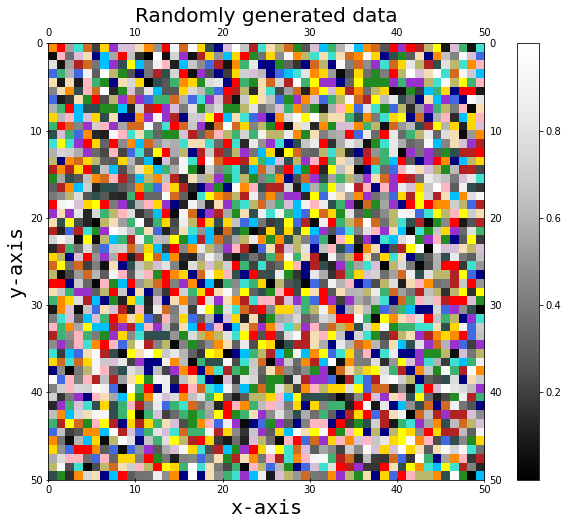

In [10]:
plot([image] + [np.random.binomial(1, .01, shape) for _ in range(100)], **annotation_params)

If only one parameter is provided for several images, all of them are displayed with it.

<Figure size 576x576 with 2 Axes>

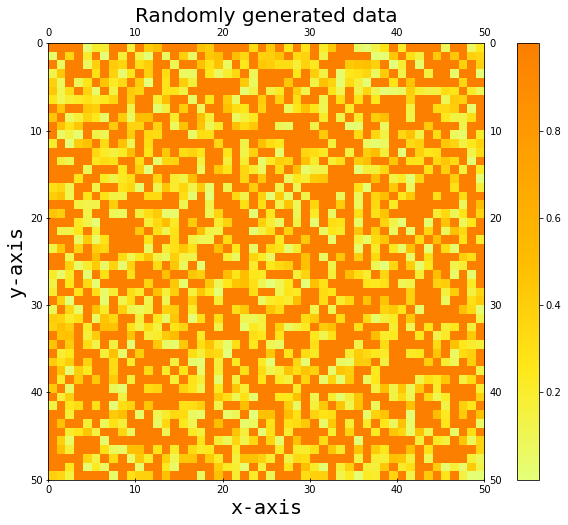

In [11]:
image_params = {
    'cmap': 'Wistia'
}

plot([image, mask_0, mask_1], **image_params, **annotation_params)

To specify parameter for every image layer, use lists of the same length as your data is.

Note that valid matplotlib colors act as single-color cmaps, which is useful for binary mask display.

<Figure size 576x576 with 2 Axes>

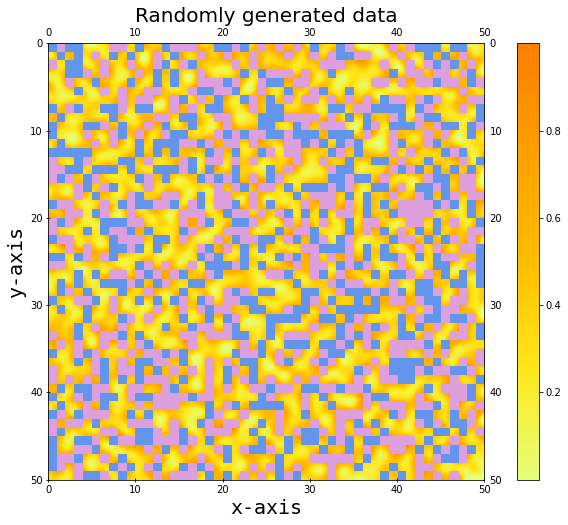

In [12]:
image_params = {
    'cmap': ['Wistia', 'cornflowerblue', 'plum'],
    'interpolation': ['bessel', None, None]
}

plot([image, mask_0, mask_1], **image_params, **annotation_params)

If one does not specify legend colors explicitly (i.e. with `'legend_'` prefix), legend labels are created only for layers displayed in a single color.

<Figure size 576x576 with 2 Axes>

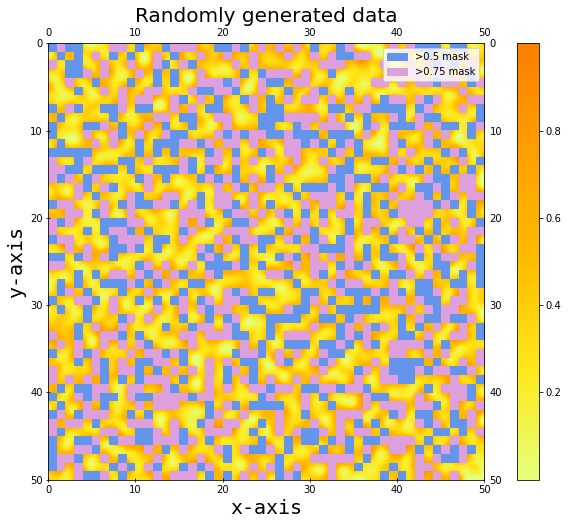

In [13]:
annotation_params['legend_label'] = ['>0.5 mask', '>0.75 mask']

plot([image, mask_0, mask_1], **image_params, **annotation_params)

To display given images separately, use `separate` bool flag.

<Figure size 1728x576 with 3 Axes>

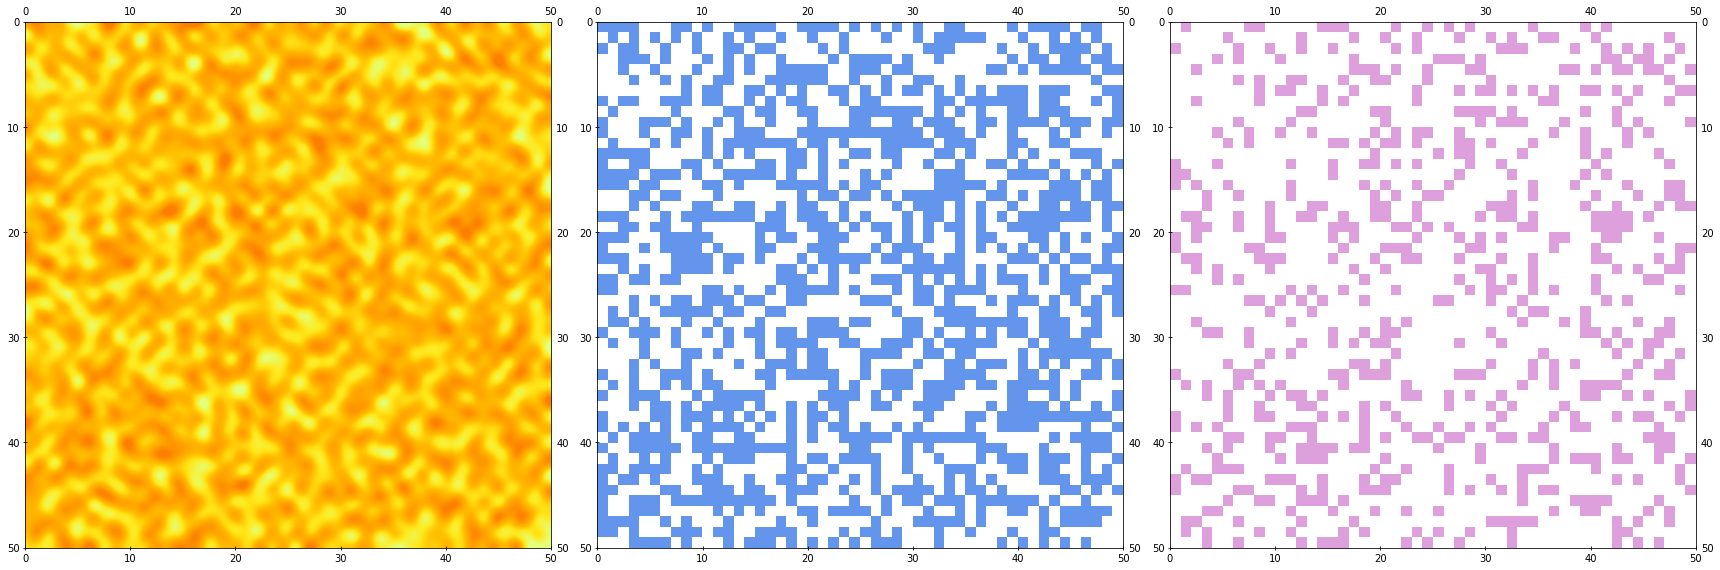

In [14]:
plot([image, mask_0, mask_1], separate=True, **image_params)

Some parameters have one or more aliases (e.g. to pass title label value one can use `title_label`, `title` or `label` keywords)

<Figure size 1728x576 with 6 Axes>

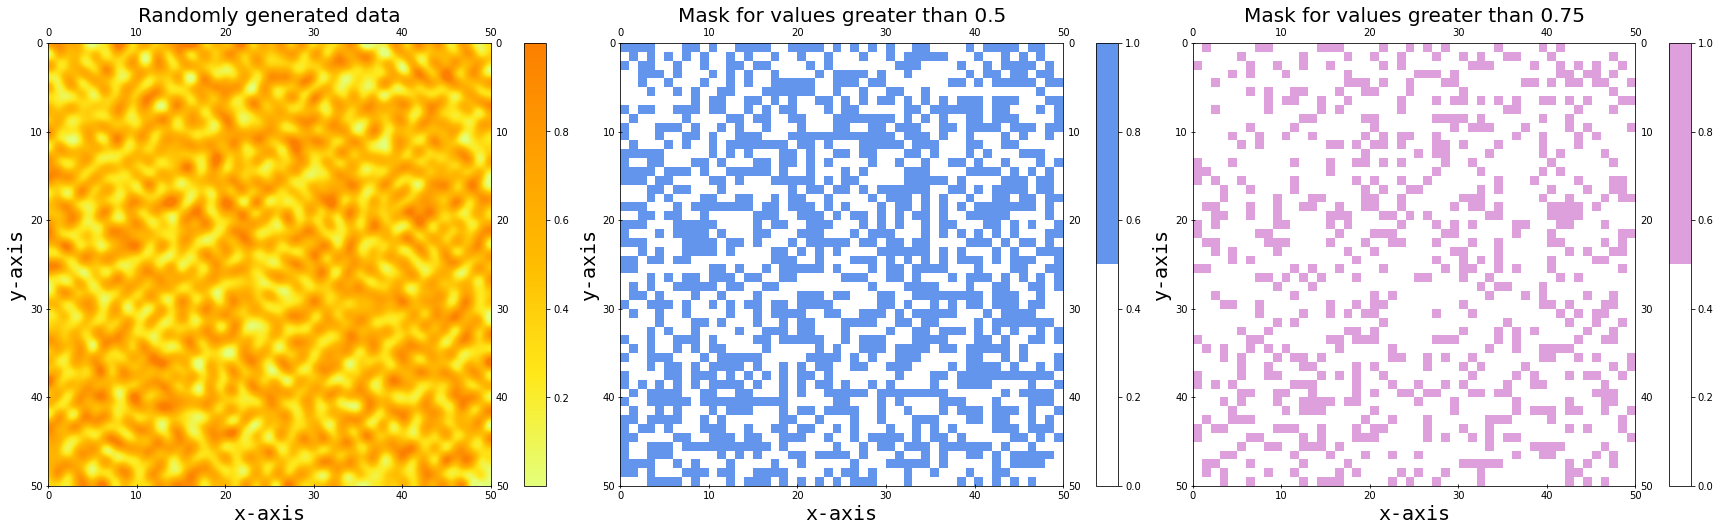

In [15]:
annotation_params['title'] = ['Randomly generated data',
                              'Mask for values greater than 0.5',
                              'Mask for values greater than 0.75']
annotation_params['legend_label'] = None

plot([image, mask_0, mask_1], separate=True, **image_params, **annotation_params)

Colorbar can be disabled for chosen images.

<Figure size 1728x576 with 6 Axes>

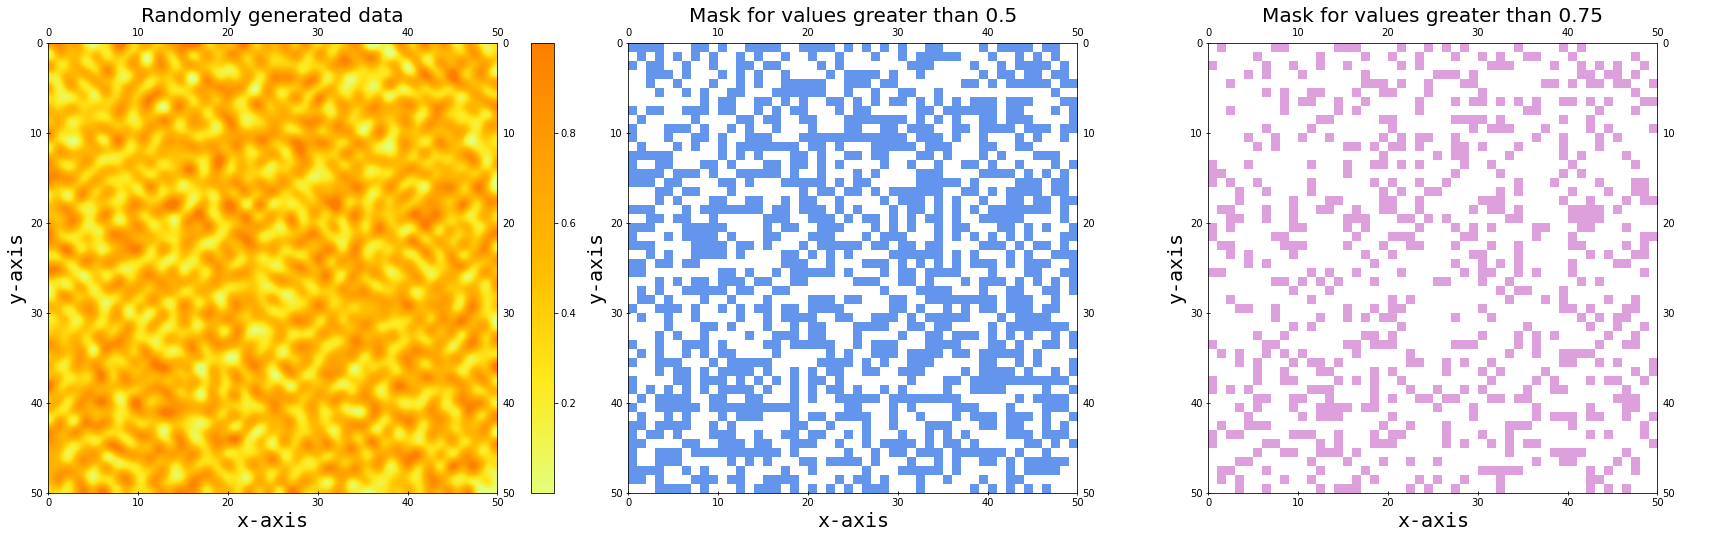

In [16]:
annotation_params['colorbar'] = [True, False, False]

plot([image, mask_0, mask_1], separate=True, **image_params, **annotation_params)

To display images in 'mixed' manner, i.e. with some image overlaid and some displayed separately, use nested lists of image arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

In [ ]:
image_params = {'cmap' : [['Wistia', 'cornflowerblue', 'plum'], ['cornflowerblue'], ['plum']]}

plot([[image, mask_0, mask_1], mask_0, mask_1], **image_params, **annotation_params)

<Figure size 1728x576 with 6 Axes>

In [ ]:
image_params['interpolation'] = [['bessel', None, None], [None], [None]]

plot([[image, mask_0, mask_1], mask_0, mask_1], **image_params, **annotation_params)

Use `None` in data list to skip a subplot for furthers modifications.

In [ ]:
canvas = plot([[image, mask_0, mask_1], None, mask_0, mask_1],
              ncols=2, **image_params, **annotation_params)
canvas

One can access `axes` and `fig` attribute if `plot` class instances.

In [ ]:
canvas.axes[1].text(.2, .5, '(❁´◡`❁)', fontsize=70, color='firebrick', family='monospace')
canvas